<a href="https://colab.research.google.com/github/HedersonSantos/PredictFligthTicket/blob/main/predicao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/HedersonSantos/PredictFligthTicket/main/data/train_tratado.csv
!wget https://raw.githubusercontent.com/HedersonSantos/PredictFligthTicket/main/data/test_tratado.csv

--2023-03-11 17:12:03--  https://raw.githubusercontent.com/HedersonSantos/PredictFligthTicket/main/data/train_tratado.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 729899 (713K) [text/plain]
Saving to: ‘train_tratado.csv’

train_tratado.csv   100%[===================>] 712.79K  --.-KB/s    in 0.04s   

2023-03-11 17:12:03 (15.5 MB/s) - ‘train_tratado.csv’ saved [729899/729899]

--2023-03-11 17:12:03--  https://raw.githubusercontent.com/HedersonSantos/PredictFligthTicket/main/data/test_tratado.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respons

In [12]:
import pandas as pd
import numpy as np
from google.colab import files, drive
from pathlib import Path
from sklearn.model_selection import train_test_split
import io, math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)
#https://machinehack.com/hackathons/predict_the_flight_ticket_price_hackathon/data     

In [110]:
train=pd.read_csv("train_tratado.csv", header=0)
target=['Price']
test=pd.read_csv("test_tratado.csv", header=0)

In [8]:
med = train.groupby(['source_latitude', 'source_longitude', 'destination_latitude',
       'destination_longitude', 'rush_time', 'Duration_in_hours',
       'Qt_Total_Stops', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', '1 Long layover',
       'Change airports', 'Business class', 'Red-eye flight', '2 Long layover'], as_index=True)[target].median()
median_map = med.stack().to_dict()      


In [13]:
train.describe()

,source_latitude,source_longitude,destination_latitude,destination_longitude,rush_time,Duration_in_hours,Qt_Total_Stops,In-flight meal not included,No check-in baggage included,1 Short layover,1 Long layover,Change airports,Business class,Red-eye flight,2 Long layover,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,22.617257,80.084974,15.661086,77.451269,0.517083,10.718221,0.824113,0.185528,0.029954,0.000094,0.001779,0.000655,0.000374,0.000094,0.000094,9087.064121
std,6.110668,5.174261,7.112499,2.197387,0.499731,8.464367,0.675244,0.388744,0.170469,0.009675,0.042137,0.025591,0.019347,0.009675,0.009675,4611.359167
min,12.994100,72.862800,10.151800,76.393000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,19.090400,77.100000,10.151800,76.393000,0.000000,2.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5277.000000
50%,22.572600,77.706800,13.198900,77.100000,1.000000,8.666667,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8372.000000
75%,28.556200,88.363900,17.240300,77.706800,1.000000,15.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12373.000000
max,28.556200,88.363900,28.556200,88.363900,1.000000,47.666667,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,79512.000000


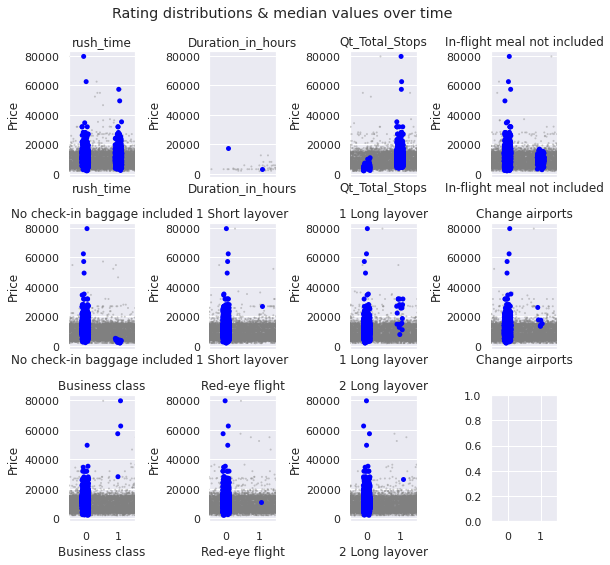

In [18]:
fig, ax = plt.subplots(nrows=3,ncols=4, sharex=True, figsize=(8,8))

vars = [ 'rush_time', 'Duration_in_hours','Qt_Total_Stops','In-flight meal not included','No check-in baggage included', 
        '1 Short layover', '1 Long layover', 'Change airports', 'Business class', 'Red-eye flight', '2 Long layover']
for e, ax in enumerate(ax.flat):
    if e==11: break
    sns.stripplot(data = train, x=vars[e], y='Price', jitter=2, size=2, alpha = .4,color='gray', ax = ax)
    sns.stripplot(data = med.reset_index(), x=vars[e], y='Price', color='blue', label='median', ax = ax)
    ax.set_title(vars[e])
plt.suptitle('Rating distributions & median values over time')
plt.tight_layout()
plt.show()


In [111]:
features_name = ['source_latitude', 'source_longitude', 'destination_latitude',
       'destination_longitude', 'rush_time', 'Duration_in_hours',
       'Qt_Total_Stops', 'In-flight meal not included',
       'Business class']
X=train[features_name]
y=train["Price"].map(np.log)
X_train,X_val,y_train,y_val = train_test_split(X,y, test_size=0.20, random_state=42)
X_test = test[features_name]

In [112]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_train)
X_train = transformer.transform(X_train)
transformer = Normalizer().fit(X_val)
X_val = transformer.transform(X_val)
transformer = Normalizer().fit(X_test)
X_test = transformer.transform(X_test)

In [74]:
#XGBoost
params = {
    "n_estimators": 500,
    "learning_rate": 0.1,
    "loss": "squared_error",
}
#"max_depth": 4,
#"min_samples_split": 5,

In [75]:
from sklearn import  ensemble
from sklearn.metrics import mean_squared_error, r2_score
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_val)
mse = mean_squared_error(y_val, y_pred )
r2 = r2_score(y_val, y_pred)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The r2 score (R2) on test set: {:.4f}".format(r2))

The mean squared error (MSE) on test set: 0.0794
The r2 score (R2) on test set: 0.7002


In [118]:
#test
y_test = reg.predict(X_test)


In [133]:
f = open('send_file.csv','wt')
f.write('Price\n')
for y in np.exp(y_test):
  f.write("{}\n".format(str(y)))
f.close()

(2671, 15)

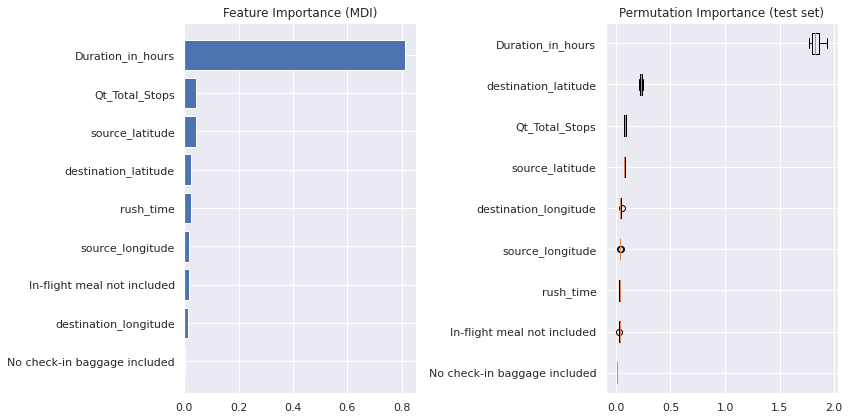

In [76]:
from sklearn.inspection import permutation_importance
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_val, y_val, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(train.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [36]:
features = ['source_latitude', 'source_longitude', 'destination_latitude',
       'destination_longitude', 'rush_time', 'Duration_in_hours',
       'Qt_Total_Stops', 'In-flight meal not included',
       'Business class']

Index(['source_latitude', 'source_longitude', 'destination_latitude',
       'destination_longitude', 'rush_time', 'Duration_in_hours',
       'Qt_Total_Stops', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', '1 Long layover',
       'Change airports', 'Business class', 'Red-eye flight', '2 Long layover',
       'Price'],
      dtype='object')

In [107]:
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.layers import Dropout

input_shape = [X_train.shape[1]]

model = tf.keras.Sequential()
model.add(keras.layers.Dense(20, input_shape = input_shape, activation = 'relu'))
model.add(keras.layers.Dropout(.4))
model.add(keras.layers.Dense(20, activation = 'relu'))
model.add(keras.layers.Dropout(.4))
model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 20)                200       
                                                                 
 dropout_22 (Dropout)        (None, 20)                0         
                                                                 
 dense_31 (Dense)            (None, 20)                420       
                                                                 
 dropout_23 (Dropout)        (None, 20)                0         
                                                                 
 dense_32 (Dense)            (None, 1)                 21        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.compile(optimizer=keras.optimizers.SGD(0.15),
              loss='mse', metrics=['mae',keras.metrics.RootMeanSquaredError()])

history = model.fit(
    X_train, y_train,
    batch_size=8,
    epochs=20,
    verbose=1,
    validation_data=(X_val, y_val),
)

Epoch 1/20
1069/1069 [==============================] - 3s 2ms/step - loss: 87.0269 - mae: 0.9547 - root_mean_squared_error: 9.3288 - val_loss: 0.2652 - val_mae: 0.4304 - val_root_mean_squared_error: 0.5150
Epoch 2/20
1069/1069 [==============================] - 2s 2ms/step - loss: 0.2692 - mae: 0.4347 - root_mean_squared_error: 0.5188 - val_loss: 0.2835 - val_mae: 0.4491 - val_root_mean_squared_error: 0.5325
Epoch 3/20
1069/1069 [==============================] - 3s 3ms/step - loss: 0.2697 - mae: 0.4351 - root_mean_squared_error: 0.5193 - val_loss: 0.2706 - val_mae: 0.4303 - val_root_mean_squared_error: 0.5202
Epoch 4/20
1069/1069 [==============================] - 2s 2ms/step - loss: 0.2704 - mae: 0.4347 - root_mean_squared_error: 0.5200 - val_loss: 0.2729 - val_mae: 0.4310 - val_root_mean_squared_error: 0.5224
Epoch 5/20
1069/1069 [==============================] - 3s 2ms/step - loss: 0.2692 - mae: 0.4353 - root_mean_squared_error: 0.5189 - val_loss: 0.2769 - val_mae: 0.4323 - val_r

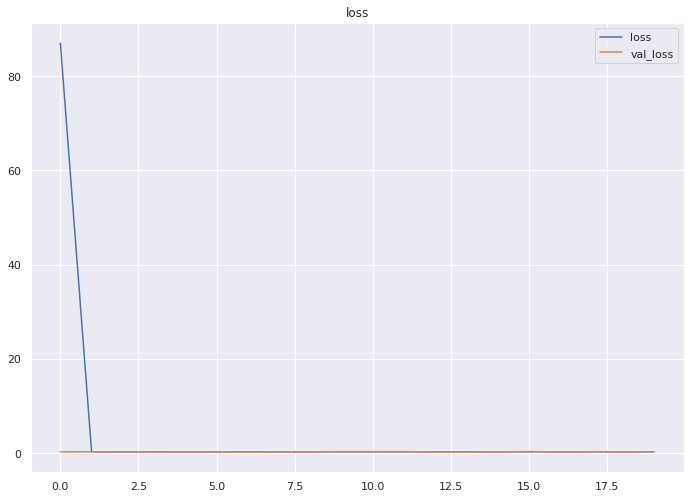

In [109]:
hist = pd.DataFrame(history.history)[['loss','val_loss']].plot(title='loss')
plt.show()